# Predicción de lluvia en Madrid

## 1. Pre-proceso el dataset

In [1]:
library(keras)

In [2]:
df <- load('Madrid_Alumno.rda') 

In [3]:
df

[1] "xTrain" "xTest"  "yTrain"

In [4]:
n = length(yTrain)
print(n)

[1] 8766


In [5]:
# Preparo la variable de ocurrencia de lluvia
rain = ifelse(yTrain < 1, 0, 1)

# Miro el máximo valor de lluvia, para normalizar la variable 'rain'
# Al final, tengo que acordarme que voy a tener que multiplicar el valor de la predicción en el test para este valor

max.rain <- max(yTrain)
max.rain

# Guardo la predicción original y normalizo
yTrain.original <- yTrain
yTrain <- yTrain / max.rain

[1] 40.6

In [6]:
# Normalizo los datasets

xTrain <- as.data.frame(xTrain)
xTrain.norm <- as.data.frame(scale(xTrain))

head(xTrain.norm)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.52142098,0.55981865,-0.9171793,0.31395345,0.458461933,0.16233670,1.7499998,1.9117031,-0.4168078,-0.66849173,⋯,-2.0399204,-2.2206501,-1.2493483,-0.8129920,-1.6175884,-1.406849,2.4038027,3.4903915,-1.0879199,-1.7797370
2,0.44727690,0.52952553,-1.0675970,-0.34164908,0.341357533,0.02978809,1.9779085,1.2983166,-0.8249920,-0.76691017,⋯,-2.4796005,-1.9629982,-1.6282727,-1.7329882,-2.7077153,-2.993713,1.5135270,0.5190716,-2.2598730,-2.9433857
3,0.03772347,0.02303596,-0.3881721,-0.54324104,0.009767975,0.02518762,2.1067254,1.8921719,0.2249257,0.19689288,⋯,-1.7036564,-1.1867436,-1.2879048,-1.7353624,-1.9364905,-2.351410,0.9555151,0.2132743,-1.8999771,-1.6280249
4,-1.72335811,-1.89546801,1.3470362,0.43817429,-0.893491576,-1.31972069,2.9865272,2.1883088,1.3729277,0.60364496,⋯,-1.9344421,-2.2020546,-0.1441246,-0.1654673,-1.1110999,-1.441957,0.9892718,0.4346358,0.5381754,1.3849966
5,-2.69341099,-2.70931847,-0.3837467,-0.61381639,-2.148102210,-2.05527774,0.5231868,-0.1918269,1.2800548,0.09570750,⋯,-1.4196737,-1.3610246,-0.6299080,-0.5990789,-1.3390705,-1.250222,0.4977676,-0.4896605,0.6406874,0.2935718
6,-2.10085749,-2.09250052,-0.2745163,0.02094807,-1.851887677,-1.54939245,-0.9790591,-1.6882284,0.7036610,0.07616532,⋯,-0.6490318,-0.3838484,-0.7576004,-0.8280296,-0.9271776,-1.068486,0.4187257,-0.2409056,0.2736218,-0.1886621


In [7]:
# Aplico al dataset the test la misma normalización que al dataset de entrenamiento
# https://datascience.stackexchange.com/questions/13971/standardization-normalization-test-data-in-r

trainMean <- apply(xTrain, 2, mean)
trainSd   <- apply(xTrain, 2, sd)

xTest <- as.data.frame(xTest)
xTest.norm <- sweep(sweep(xTest, 2L, trainMean), 2, trainSd, "/")

head(xTest.norm)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6379673,0.75290759,0.5917206,-0.3041471,0.3274740,0.3539039,1.776219,1.141768,-0.05714004,0.6405975,⋯,-0.6199747,-0.5987160,-0.8408304,-0.3246940,-0.61372068,-0.49936470,0.4339928,0.5607600,-1.325054840,-1.0292307
2,0.4183818,0.35939736,-0.3388903,-0.8832639,0.3779006,0.4678298,2.717766,2.629239,1.54727554,1.5466540,⋯,-0.3904226,-0.5705003,0.4386167,0.2276853,-0.02763776,-0.02703828,2.2295538,2.4968296,-0.261390879,-0.3600638
3,-0.2100928,-0.05317012,-0.4410847,0.1411624,-0.3854247,-0.5702071,2.501309,2.047083,1.90339017,1.2995759,⋯,-0.9842224,-1.0610985,-0.1669691,-0.3682557,-0.66397103,-0.64334852,3.0078470,2.8665486,0.001767713,-0.3305455
4,-0.4851375,-0.48701398,-0.5224260,0.2096232,-0.2186639,-0.8908143,1.758244,1.437589,0.20093977,0.4174770,⋯,-1.5156033,-1.4554449,-1.2647502,-0.9530235,-1.50813359,-1.18717745,1.6825174,2.2316662,0.177076886,-0.4431701
5,-0.7594815,-0.98485288,0.2194023,-0.5108478,-0.2495626,-0.4749695,1.506337,1.672491,-0.65396791,-0.3565761,⋯,-2.3114263,-2.3661289,-1.6627814,-1.5211448,-1.64008857,-1.86503976,1.3696095,0.5465005,-0.955277482,-1.2527752
6,-0.8949669,-1.14205794,1.0160999,-0.2163544,-0.1931065,-0.8038468,1.491730,1.767074,-1.28217139,-1.3758111,⋯,-1.9686848,-2.3484660,-0.1829465,-0.7520126,-0.99202781,-1.32116757,-0.1492214,-1.0151496,0.746333377,0.7311858


In [8]:
# Me quedo solo con las variables que tengas correlación con y grande
# |corr(y,Xn)| > 0.4

xTest.norm <- xTest.norm[,cor(xTrain.norm, yTrain, method = "spearman") > 0.4 | cor(xTrain.norm, yTrain, method = "spearman") < -0.4]
xTrain.norm <- xTrain.norm[,cor(xTrain.norm, yTrain, method = "spearman") > 0.4 | cor(xTrain.norm, yTrain, method = "spearman") < -0.4]

ncol(xTrain.norm)

[1] 27

In [12]:
# Dataset de entrenamiento
#indtrain   <- sample(1:n, round(0.8*n)) 
x_train    <- xTrain.norm#[indtrain,]
y_train    <- yTrain#[indtrain]
rain_train <- rain#[indtrain]
train      <- x_train

# Añado las variables objetivo
train['y'] <- y_train
train['rain'] <- as.factor(rain_train)

# Miro el dataset
head(train)

,V2,V8,V11,V12,V21,V22,V31,V32,V41,V42,⋯,V112,V121,V122,V131,V132,V142,V172,V182,y,rain
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.55981865,1.9117031,0.1993214,0.1665263,-0.2095765,-0.25461294,-0.6197651,-0.5624342,-0.9816893,-0.7572839,⋯,-0.02482558,-0.3176897,-0.4366278,-0.7702438,-0.7598350,-0.9842227,-0.5721020,-0.8926194,0.004926108,0
2,0.52952553,1.2983166,0.1627355,0.2495148,-0.1703766,-0.02175429,-0.4868134,-0.1788423,-0.7423454,-0.2712671,⋯,-0.02810184,-0.4282218,-0.2740161,-0.7697054,-0.4181924,-0.4826559,-0.4308320,-0.5572690,0.000000000,0
3,0.02303596,1.8921719,-0.2987068,-0.3539133,-0.6993937,-0.81675837,-1.1670160,-1.3084577,-1.5468978,-1.7849236,⋯,-0.36327799,-0.6168665,-0.7509311,-1.0111663,-1.1840186,-1.5020496,-0.7337646,-1.0918911,0.182266010,1
4,-1.89546801,2.1883088,-2.0591193,-2.1519831,-2.2280541,-2.25451174,-2.3179953,-2.3402108,-2.4018078,-2.4690132,⋯,-2.07818136,-2.0827600,-2.3201544,-2.3127805,-2.5424191,-2.8414585,-2.3164525,-2.5630873,0.000000000,0
5,-2.70931847,-0.1918269,-2.5795596,-2.4552997,-2.3831450,-2.18478019,-2.1404381,-1.9280794,-1.8437585,-1.6593502,⋯,-2.40741927,-2.2625287,-2.2508299,-2.1695384,-2.0557912,-1.9638879,-2.2200691,-2.0489055,0.000000000,0
6,-2.09250052,-1.6882284,-1.8465892,-1.6109739,-1.5233764,-1.19108936,-0.9453392,-0.7448767,-0.3703397,-0.2219074,⋯,-1.46825113,-1.4307974,-1.1705165,-1.2035977,-0.8272236,-0.4209276,-1.0901811,-0.8045411,0.039408867,1


In [13]:
# Dataset de test (solo tengo la x, voy a producir la y en el ejercicio)

test <- xTest.norm
head(test)

,V2,V8,V11,V12,V21,V22,V31,V32,V41,V42,⋯,V91,V92,V112,V121,V122,V131,V132,V142,V172,V182
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.75290759,1.141768,0.40224230,0.51632335,0.1375952,0.2234493,-0.1409558,-0.1470831,-0.4291938,-0.5882932,⋯,-0.3359317,-0.4576176,0.5811157,0.20658239,0.3120549,-0.007498034,-0.03892583,-0.3646269,0.2971413,0.0008542286
2,0.35939736,2.629239,0.04012666,-0.06049705,-0.3488344,-0.4163598,-0.7505904,-0.8248219,-1.1620435,-1.2625161,⋯,-1.0101216,-1.1404874,0.1998671,-0.07302332,-0.1830543,-0.430495181,-0.61164288,-1.0166397,-0.1332366,-0.4985827554
3,-0.05317012,2.047083,-0.58397350,-0.40062244,-0.9483776,-0.7424193,-1.2814889,-1.0541592,-1.5719411,-1.3791323,⋯,-1.4849729,-1.3081832,-0.1759991,-0.70090712,-0.5646023,-1.083563616,-0.93829895,-1.2389235,-0.5111116,-0.8687989831
4,-0.48701398,1.437589,-0.73044810,-0.64375459,-0.8999484,-0.7159723,-1.0602539,-0.7993077,-1.1457254,-0.8739352,⋯,-1.2343429,-0.9507407,-0.6239431,-0.98936604,-0.7789255,-1.182136086,-0.92820205,-1.0556047,-0.8426946,-1.0022978782
5,-0.98485288,1.672491,-1.02762698,-1.30063485,-1.5230993,-1.6404433,-1.8885964,-1.8983636,-1.9483321,-1.9878324,⋯,-1.8212143,-1.9126845,-1.3451625,-1.45044956,-1.6109350,-1.671715190,-1.79114573,-1.8380083,-1.5835814,-1.7428017948
6,-1.14205794,1.767074,-1.18789896,-1.42038682,-1.5301252,-1.6018960,-1.7192422,-1.6501859,-1.7019466,-1.6166105,⋯,-1.7942928,-1.7152382,-1.9096904,-2.12296260,-2.0089208,-2.069541835,-1.97991511,-1.8654851,-2.1804548,-2.1805535424


## 2. Preparo el entrenamiento

### Empiezo con la red que discrimina entre lluvia y no lluvia

In [22]:
# Defino el modelo
model.rain <- keras_model_sequential() 

model.rain %>% 
  layer_dense(units = 30, input_shape = ncol(train)-2, activation = "relu", kernel_regularizer = regularizer_l2(0.005)) %>% 
  layer_dropout(0.5) %>%
  layer_dense(units = 10, activation = "relu", kernel_regularizer = regularizer_l2(0.005)) %>%
  layer_dropout(0.5) %>%
  layer_dense(units = 2 , activation = "sigmoid")#"softmax") 
str(model.rain)

Model
Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_3 (Dense)                     (None, 30)                      840         
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 30)                      0           
________________________________________________________________________________
dense_4 (Dense)                     (None, 10)                      310         
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 10)                      0           
________________________________________________________________________________
dense_5 (Dense)                     (None, 2)                       22          
Total params: 1,172
Trainable params: 1,172
Non-trainable params: 0
_____________

In [23]:
# Compilo el modelo
model.rain %>% compile(
  optimizer = optimizer_adagrad(lr = 0.005),
  loss = "binary_crossentropy",
  metrics = "binary_accuracy"
)

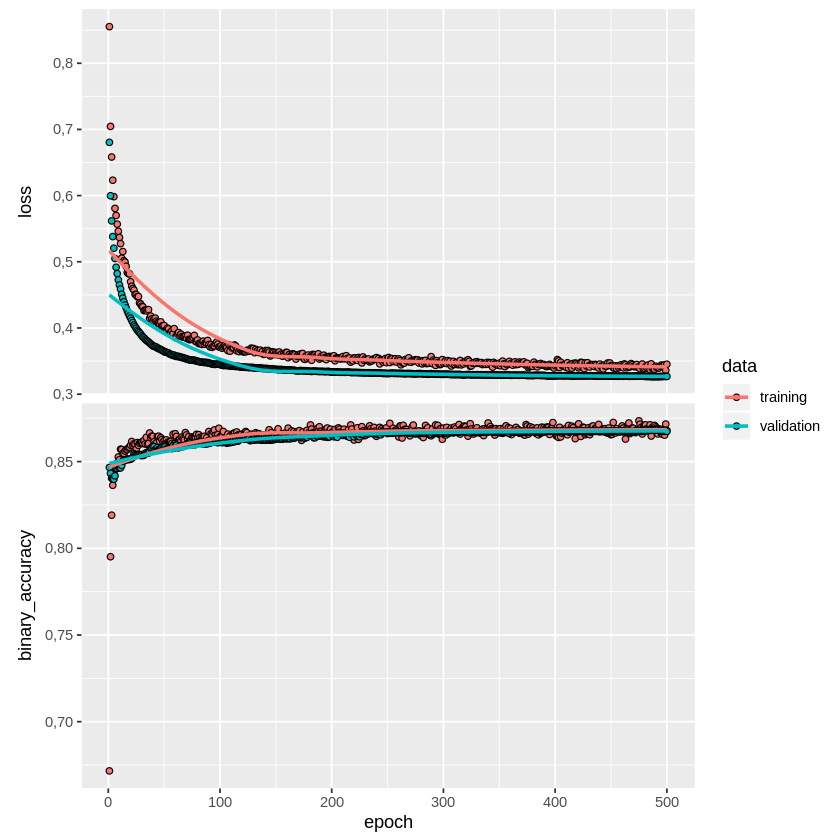

In [24]:
# Entreno el modelo

my.train.x <- as.matrix(train[ , 1:ncol(test)])
my.train.y <- to_categorical(train$rain, 2)

history <- model.rain %>% fit(x = my.train.x, 
                              y = my.train.y, 
                              epochs = 500, 
                              batch_size = 20,
                              validation_split = 0.2)

plot(history)

To-do list:
- PCA
- subsample validación